#Supplement Sales Data Anaylsis


##Introduction

The purpose of this project is to analyse weekly sales data for nutritional supplements in order to uncover meaningful business insights. By examining sales patterns over time, across product categories, and in relation to pricing and returns, the analysis aims to answer key questions:

What are the overall sales and revenue trends over time?

Which supplement categories and products contribute most to revenue and profitability?

Are there seasonal or cyclical patterns in customer purchasing behavior?

How do discounts and product returns affect net revenue?

The ultimate goal is to translate raw sales data into actionable insights that can guide strategic decisions, improve inventory planning, and highlight growth opportunities.

##Data Import & Overview

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import warnings

In [ ]:
warnings.filterwarnings("ignore")

In [ ]:
df=pd.read_csv("Supplement_Sales_Weekly_Expanded.csv")

#####To begin the analysis, the first task is to import the dataset that contains weekly sales figures for nutritional supplements. This forms the foundation of all subsequent exploration and insights. his is a standard and efficient way to handle structured tabular data in Python, allowing for advanced manipulation, cleaning, and analysis.

##Data Cleaning & Preprocessing

In [ ]:
df.head()

,Date,Product Name,Category,Units Sold,Price,Revenue,Discount,Units Returned,Location,Platform
0,2020-01-06,Whey Protein,Protein,143,31.98,4573.14,0.03,2,Canada,Walmart
1,2020-01-06,Vitamin C,Vitamin,139,42.51,5908.89,0.04,0,UK,Amazon
2,2020-01-06,Fish Oil,Omega,161,12.91,2078.51,0.25,0,Canada,Amazon
3,2020-01-06,Multivitamin,Vitamin,140,16.07,2249.80,0.08,0,Canada,Walmart
4,2020-01-06,Pre-Workout,Performance,157,35.47,5568.79,0.25,3,Canada,iHerb


The dataset has successfully loaded and the first few rows reveal the structure. The dataset captures multiple attributes: product type, category, sales volume, price, revenue, discount levels, returns, geographic location, and sales platform. enabling analysis across several commercial levers:

*   Product performance → Which supplements drive the highest units sold and revenue.
*   Pricing and discounting → How promotional activity influences sales.
*   Returns behaviour → Understanding refund trends across products and regions.
*   Channel performance → Comparing e-commerce (Amazon, iHerb) vs retail (Walmart).
*   Geographic variation → Sales dynamics in different markets such as the UK vs Canada.

By importing the dataset, we have established a robust starting point for examining supplement sales patterns over time, supporting strategic decisions in pricing, promotions, and channel strategy. This step ensures that the data is readily available for quality checks, visualisation, and modelling. For stakeholders, this is equivalent to assembling the raw financial and operational records into a format that can be interrogated for meaningful commercial insights — such as identifying growth opportunities, sales seasonality, or underperforming product lines.

In [ ]:
#Set date into date time format
df["Date"]=pd.to_datetime(df["Date"])

By structuring the Date field correctly, it allows us to:

*   Analyse sales trends over time (weekly, monthly, yearly).
*   Identify seasonality patterns such as New Year demand spikes or summer slowdowns.
*   Track growth trajectories to inform forecasting and capacity planning.
*   Align sales data with external events (e.g., promotions, product launches, or regional campaigns).

Enabling for business foresight — ensuring that subsequent analyses will provide clear, time-based insights into performance drivers and market opportunities.

In [ ]:
df.isna().sum().sum()

np.int64(0)

No missing values are present in the dataset. Analyses and forecasts will not be biased by incomplete information. No imputation or corrective measures are required, saving time and reducing complexity. Confidence in the dataset’s integrity is high, making it a trustworthy foundation for strategic insights.

In [ ]:
df.duplicated().sum()

np.int64(0)

The dataset contains no duplicate entries. ensuring financial insights are credible and signals strong data governance in the underlying sales recording systems, which is reassuring for business leaders relying on these figures for strategic decisions.

##Exploratory Data Analysis (EDA)

In [ ]:
df.describe()

,Date,Units Sold,Price,Revenue,Discount,Units Returned
count,4384,4384.000000,4384.000000,4384.000000,4384.000000,4384.000000
mean,2022-08-18 12:00:00,150.200274,34.781229,5226.569446,0.124398,1.531478
min,2020-01-06 00:00:00,103.000000,10.000000,1284.000000,0.000000,0.000000
25%,2021-04-26 00:00:00,142.000000,22.597500,3349.372500,0.060000,1.000000
50%,2022-08-18 12:00:00,150.000000,34.720000,5173.140000,0.120000,1.000000
75%,2023-12-11 00:00:00,158.000000,46.712500,7009.960000,0.190000,2.000000
max,2025-03-31 00:00:00,194.000000,59.970000,10761.850000,0.250000,8.000000
std,NaN,12.396099,14.198309,2192.491946,0.071792,1.258479


Initial statistical overview of the supplement sales dataset, identifying central tendencies, variability, and the range of key commercial metrics such as units sold, prices, revenues, discounts, and returns.

Key findings from the summary include:



*   Units Sold → On average, 150 units were sold per product per week, ranging from 103 to 194. Variation is relatively low (std ≈ 12), suggesting stable weekly demand across products.

*   Price → Average price is around £34.78, with products ranging from £10.00 (entry-level supplements) to £59.97 (premium items).

*   Revenue → Weekly revenue per product averages £5,226, ranging from £1,284 to over £10,761. Standard deviation (≈ £2,192) indicates significant differences between high- and low-performing products.
*   Discount → The mean discount is 12%, with most promotions falling between 6% and 19%. The maximum of 25% reflects occasional deeper campaigns.


*   Units Returned → Returns are minimal, averaging just 1.5 units per product per week, with a maximum of 8 units, indicating low customer dissatisfaction or defects.


*   Time Span → The dataset covers sales from January 2020 through to March 2025, providing over five years of sales history.

These descriptive statistics highlight several business-relevant insights:



*   Stable Demand → The narrow range in units sold suggests supplements enjoy consistent weekly demand, a strong indicator of reliable cash flow.
*   Premium Positioning → With an average price near £35 and a ceiling close to £60, the brand portfolio leans towards mid- to high-value segments, positioning it competitively in the health and wellness market.


*   Revenue Growth Potential → The wide spread in revenue suggests opportunities to replicate strategies used for top-performing products across weaker ones.

*   Promotional Impact → Discounts are moderate on average, implying that sales growth is not overly reliant on heavy promotions — a sign of strong organic demand.
*   Low Returns → Minimal returns confirm both product quality and customer satisfaction, strengthening brand reputation and reducing operational costs.
















In [ ]:
df.describe(include="object")

,Product Name,Category,Location,Platform
count,4384,4384,4384,4384
unique,16,10,3,3
top,Whey Protein,Vitamin,Canada,iHerb
freq,274,822,1507,1499


To understand the breadth and distribution of categorical attributes in the dataset, including product types, categories, locations, and platforms. This provides context for how sales are spread across different commercial dimensions.



*   Product Name → 16 unique supplements are sold. Whey Protein is the most frequently appearing product, with 274 records, suggesting it is a consistent bestseller.

*   Category → 10 distinct product categories exist. Vitamins dominate with 822 entries, reflecting strong consumer demand for general wellness.

*   Location → Sales are spread across 3 markets, with Canada leading at 1,507 records, highlighting it as the dataset’s largest market.
*   Platform → 3 sales channels are represented, with iHerb accounting for 1,499 transactions, making it the most utilised distribution channel.

These findings outline the commercial footprint of the supplement business:



*   Portfolio Concentration → Despite 16 unique products, a small subset (e.g., Whey Protein, Vitamins) generates disproportionate activity, identifying clear leaders in consumer preference.

*   Category Strength → Vitamins dominate the category mix, confirming their broad market appeal and positioning them as a growth driver.
*   Category Strength → Vitamins dominate the category mix, confirming their broad market appeal and positioning them as a growth driver.


*   Category Strength → Vitamins dominate the category mix, confirming their broad market appeal and positioning them as a growth driver.


*   Geographic Dependence → Canada contributes a large share of sales, which provides stability but also signals risk if over-reliant on a single market.
*   Geographic Dependence → Canada contributes a large share of sales, which provides stability but also signals risk if over-reliant on a single market.


*   Channel Strategy → iHerb’s dominance suggests strong digital/e-commerce penetration. However, the relatively smaller share from Amazon and Walmart may highlight underutilised opportunities in other platforms.



##Time-Series Analysis

In [ ]:
daily_sales = df.groupby("Date").agg({
    "Units Sold": "sum",
    "Revenue": "sum",
    "Units Returned": "sum"
}).reset_index()

daily_sales

,Date,Units Sold,Revenue,Units Returned
0,2020-01-06,2406,71848.56,19
1,2020-01-13,2374,72416.18,27
2,2020-01-20,2370,76152.42,26
3,2020-01-27,2397,70306.73,29
4,2020-02-03,2384,98011.64,34
...,...,...,...,...
269,2025-03-03,2431,66065.44,36
270,2025-03-10,2411,92509.57,30
271,2025-03-17,2381,65590.53,22
272,2025-03-24,2416,69778.44,27


To transform the dataset into a time-series view of daily sales performance, consolidating transactional-level detail into daily totals. This enables clear tracking of sales, revenue, and returns trends over time.

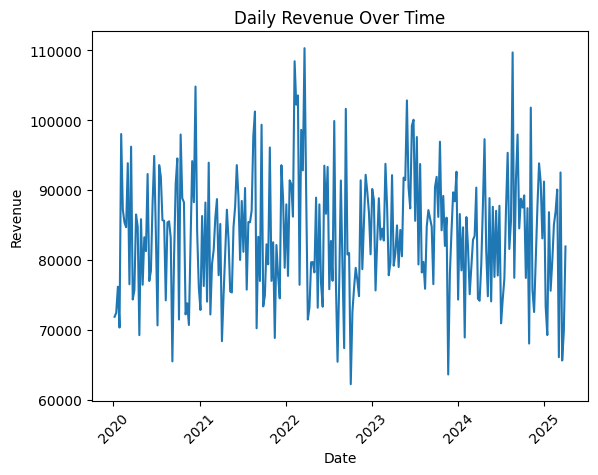

In [ ]:
sns.lineplot(data=daily_sales, x="Date", y="Revenue")
plt.title("Daily Revenue Over Time")
plt.xticks(rotation=45)
plt.show()

Visualise daily revenue trends over time, enabling stakeholders to quickly identify patterns, fluctuations, and potential seasonality in supplement sales performance.

Daily revenue generally ranges between £70,000 and £100,000, with occasional spikes above £110,000 and dips closer to £60,000.
No clear upward or downward long-term trend is visible, indicating that sales performance has been broadly consistent year on year, despite fluctuations.



*   Revenue volatility → The sharp peaks and troughs may align with promotional campaigns, seasonality (e.g., New Year fitness demand), or regional factors.

*   Stable baseline demand → Despite fluctuations, core revenues remain strong, which provides confidence in sustained market interest.

*   Opportunity for smoothing → By better managing promotional calendars or stock levels, the company could aim to reduce variability and stabilise cash flow.
*   Forecasting potential → This time-series view sets the stage for predictive modelling, enabling more accurate demand forecasting and inventory planning.











This visualisation provides stakeholders with a clear, accessible snapshot of sales dynamics, shifting the conversation from raw numbers to strategic discussions around demand cycles, promotional effectiveness, and long-term growth planning.

##Data Analysis

In [ ]:
category_revenue = df.groupby("Category")["Revenue"].sum().sort_values(ascending=False)

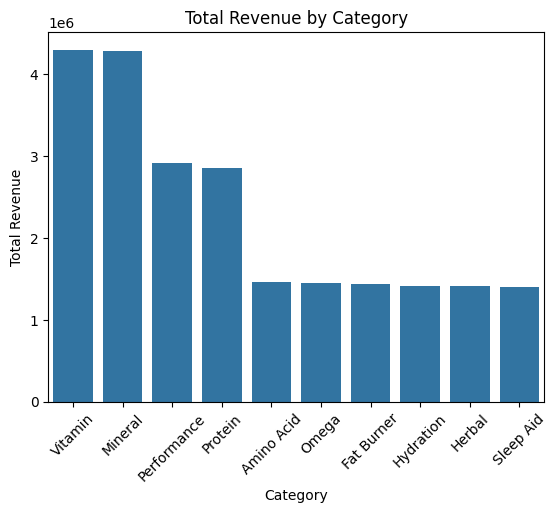

In [ ]:
sns.barplot(x=category_revenue.index, y=category_revenue.values)
plt.title("Total Revenue by Category")
plt.xlabel("Category")
plt.ylabel("Total Revenue")
plt.xticks(rotation=45)
plt.show()

To identify which product categories generate the most revenue, providing a clear view of the company’s sales drivers and highlighting where strategic focus may yield the greatest returns. A bar chart was used to visually compare revenue contributions across categories.

The chart shows a clear revenue hierarchy:


*   Vitamins and Minerals are the dominant categories, each generating over £4 million in revenue.

*   Performance supplements (e.g., pre-workouts) and Protein products follow, contributing around £2.8–2.9 million each.
*   Categories such as Amino Acids, Omega, Fat Burners, Hydration, Herbal, and Sleep Aids contribute significantly less (c. £1.4–1.5 million each).










This analysis delivers several commercially relevant insights:



*   Core revenue drivers → Vitamins and Minerals are clear market leaders, warranting ongoing investment in product innovation and marketing.

*   Growth opportunities → Performance and Protein categories represent strong mid-tier performers, suggesting potential to grow them into top-tier contributors with targeted campaigns.

*   Portfolio diversification → Lower-revenue categories, while smaller, still collectively represent a meaningful share. They may offer opportunities in niche markets (e.g., Herbal or Sleep Aid for wellness-focused consumers).

*   Strategic focus → Understanding this revenue distribution enables better resource allocation — ensuring high-performing categories are maximised while selectively nurturing emerging segments.











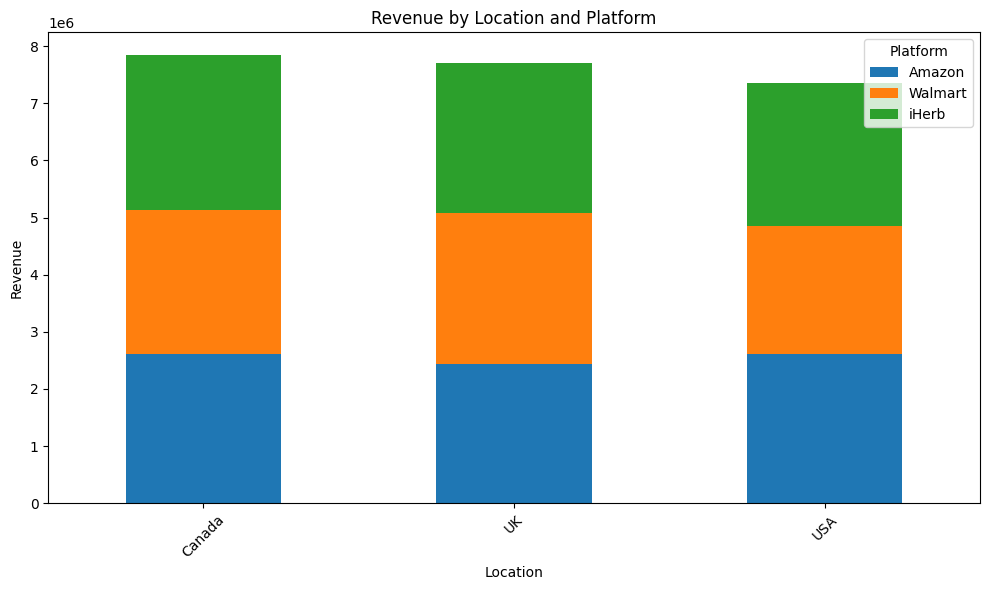

In [ ]:
loc_platform = df.groupby(["Location","Platform"])["Revenue"].sum().unstack().fillna(0)

loc_platform.plot(kind='bar', stacked = True, figsize = (10,6))
plt.title("Revenue by Location and Platform")
plt.xlabel("Location")
plt.ylabel("Revenue")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Evaluate how revenue is distributed across different countries and sales platforms, providing insights into the geographic and channel performance of supplement sales. Revenue was aggregated by both Location and Platform, then visualised as a stacked bar chart.

The chart reveals:



*   Canada and the UK lead in overall revenue, each generating around £7.7–7.8 million.

*   The USA follows closely with approximately £7.3 million.

Across all markets, revenue is well-distributed among platforms:



*   Amazon contributes a strong baseline across all regions (~£2.5–2.6 million each).

*   Walmart is also a consistent performer, especially in Canada and the UK.

*   iHerb delivers substantial contributions, notably in Canada and the UK, helping elevate their totals above the USA.



For stakeholders, this view highlights both geographic performance and channel dynamics:

*   Balanced multi-channel strategy → Sales are not over-reliant on a single platform, reducing channel risk.
*   Regional leadership → Canada and the UK edge slightly ahead of the USA in revenue, suggesting stronger consumer engagement or promotional effectiveness.


*   E-commerce strength → Amazon and iHerb together represent a significant share of revenue, underlining the importance of maintaining digital-first strategies.


*   Strategic actions → The USA, while strong, shows slightly lower revenue; targeted campaigns or partnerships could unlock additional growth.









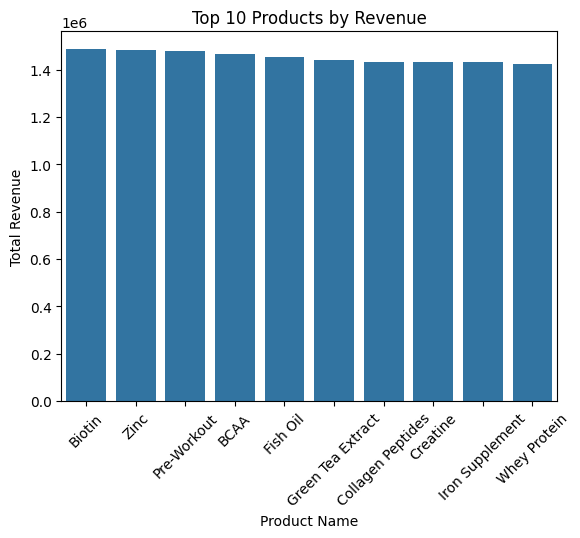

In [ ]:
top_products = df.groupby('Product Name')['Revenue'].sum().sort_values(ascending=False).head(10)

sns.barplot(x=top_products.index, y=top_products.values)
plt.title("Top 10 Products by Revenue")
plt.xlabel("Product Name")
plt.ylabel("Total Revenue")
plt.xticks(rotation=45)
plt.show()

Identify the top-performing products by total revenue, allowing stakeholders to see which supplements drive the greatest financial contribution and where the business should focus on sustaining or expanding market share. The dataset was grouped by Product Name, total revenue was summed for each, and the top 10 products were extracted. The results were visualised in a bar chart.

The bar chart shows that:



*   Biotin is the single best-selling product, generating nearly £1.5 million in revenue.

*   Zinc and Pre-Workout follow closely, each contributing just under £1.5 million.

*   Other top contributors include BCAA, Fish Oil, Green Tea Extract, Collagen Peptides, Creatine, Iron Supplement, and Whey Protein, each also achieving revenues in the £1.4–£1.45 million range.

*   The revenue distribution across these top products is relatively balanced, with only a modest gap separating the leader (Biotin) from the others.

This analysis highlights where the company’s product-level strengths lie:

*   Biotin’s leadership suggests strong consumer demand, potentially linked to health and wellness trends around hair, skin, and nails.


*   Core categories like Protein and Performance (e.g., Pre-Workout, Whey Protein, Creatine, BCAA) feature prominently, reinforcing the importance of the fitness-focused consumer segment.


*   Diverse appeal → With both wellness (Biotin, Zinc, Green Tea Extract, Collagen Peptides) and performance (Protein, Creatine, Pre-Workout) products in the top 10, the brand demonstrates breadth across different consumer needs.


*   Strategic opportunity → The relative closeness of revenue figures suggests that with targeted marketing or bundling strategies, mid-ranking products could be elevated to rival the top seller.









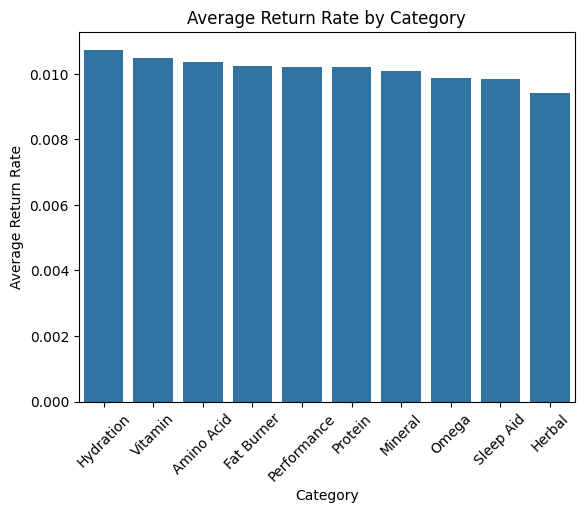

In [ ]:
#Analyse return Rate

df["Return Rate"] = df["Units Returned"] / df["Units Sold"]

category_return = df.groupby("Category")["Return Rate"].mean().sort_values(ascending=False)

sns.barplot(x=category_return.index, y=category_return.values)
plt.title("Average Return Rate by Category")
plt.xlabel("Category")
plt.ylabel("Average Return Rate")
plt.xticks(rotation=45)
plt.show()

To evaluate which product categories experience the highest return rates, providing insight into potential issues with customer satisfaction, product quality, or suitability. A new metric, Return Rate, was calculated at the row level This was then aggregated by category to calculate the average return rate per category. The results were visualised using a bar chart for easy comparison across categories.

The chart shows:

*   Hydration products have the highest average return rate (~1.08%).

*   Vitamins and Amino Acids follow closely, also exceeding 1.0%.

*   Categories such as Fat Burners, Performance, and Protein sit in the middle range.

*   Mineral, Omega, Sleep Aid, and Herbal products record the lowest return rates, falling just below 1.0%.

This analysis provides valuable operational insights:

*   Hydration and Vitamin products may warrant closer review — higher returns could stem from taste, formulation issues, or mismatched customer expectations.

*   Low-return categories like Minerals and Herbal supplements demonstrate stronger customer satisfaction and product fit.

*   Commercial implications → Even small differences in return rates can translate into material impacts on profit margins, customer loyalty, and brand reputation.

This insight can guide product quality checks, packaging improvements, or clearer customer communication to reduce return volumes.

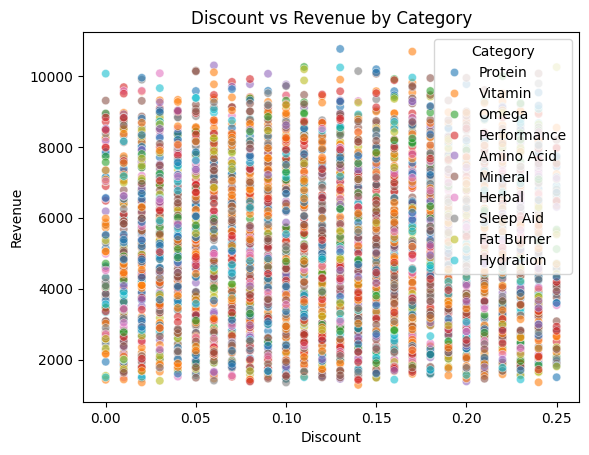

In [ ]:
sns.scatterplot(data=df, x="Discount",y="Revenue",hue="Category", alpha= 0.6)
plt.title("Discount vs Revenue by Category")
plt.show()

To explore the relationship between discount levels and revenue generation across different supplement categories. This analysis helps determine whether discounting strategies are effective in driving sales or if they risk eroding margins without significantly boosting revenue. A scatterplot was created to plot individual transactions by discount rate (x-axis) and revenue (y-axis), with points coloured by product category. Each dot represents a single sales record and Transparency (alpha=0.6) was applied to manage overlap and highlight density.

The scatterplot shows:

*   Revenue points are widely distributed across discount levels, from 0% to 25%.

*   There is no strong linear correlation between higher discounts and higher revenue; revenue remains spread across the full discount range.

*   Certain categories (e.g., Vitamins, Protein, Performance) appear consistently across the revenue spectrum, indicating resilience regardless of discounting.

*   Other categories cluster more tightly, suggesting less sensitivity to promotional discounts.

This analysis provides important commercial implications:

*   Discounting does not guarantee higher revenue → High revenue transactions occur both at low and moderate discount levels.

*   Category differences matter → Some categories (like Protein and Vitamins) generate strong revenue without requiring deep discounting, while others may rely more heavily on promotions.

*   Margin preservation opportunity → Since discounts above ~15% do not clearly drive incremental revenue, there may be room to optimise promotional spend and protect margins.

For stakeholders, this insight supports smarter pricing strategies that focus on maintaining value perception rather than defaulting to heavy discounting.

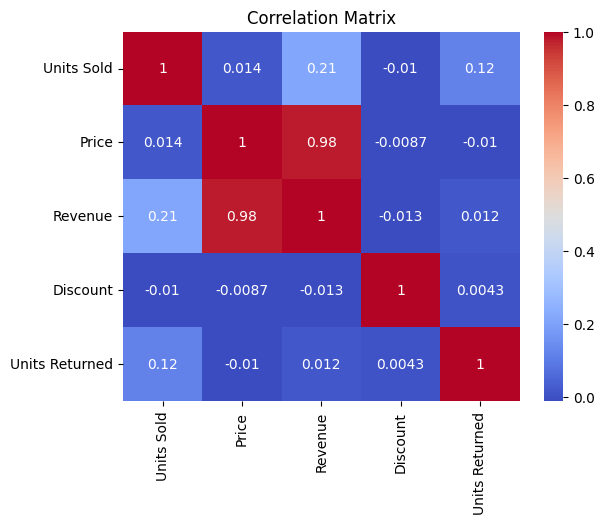

In [ ]:
corr = df[["Units Sold","Price","Revenue","Discount","Units Returned"]].corr()

sns.heatmap(corr, annot=True, cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()

To understand the relationships between key variables in the dataset — such as sales volume, price, revenue, discount, and product returns. Correlation analysis helps identify which factors move together and where dependencies might exist, informing pricing, sales, and promotional strategies. A correlation matrix was computed and visualised as a heatmap:
Pearson correlation coefficients measure the linear strength of relationships (ranging from -1 to +1).

A heatmap provides a clear visual of both magnitude and direction of correlations.

The heatmap reveals several key findings:

*   Price and Revenue show an extremely strong positive correlation (0.98). This is expected, as revenue is directly calculated from price × units sold.

*   Units Sold and Revenue show a modest positive correlation (0.21), indicating that while higher sales volume does contribute to revenue, pricing has a much larger influence.

*   Units Sold and Units Returned show a weaker but noticeable positive correlation (0.12) — higher sales volumes naturally lead to slightly more returns.

*   Discount has negligible correlations with all variables (close to 0), confirming that discounts do not strongly drive higher revenue, units sold, or returns.

For stakeholders, the key takeaways are:

*   Revenue is price-driven → Maintaining strong price points is more impactful than purely chasing sales volumes.

*   Discounting has limited effect → The lack of correlation between discounts and revenue reinforces earlier findings that heavy discounting may not be an effective growth lever.

*   Return management → While returns rise with higher sales, the effect is minor and not a major concern in overall sales performance.

*   Strategic implication → Focus should remain on premium pricing and product positioning, rather than relying heavily on discounts to drive growth.

## Interactive Visualisation

In [ ]:


fig = px.line(df, x='Date', y="Revenue" ,color="Category", title="Revenue Over Time by Category")
fig.show()

Interactive, category-level view of revenue trends over time, enabling stakeholders to explore patterns dynamically, compare categories, and identify periods of growth, volatility, or stability. An interactive line chart was built using Plotly Express:
Each line represents a supplement category.

The x-axis tracks time (2020–2025), while the y-axis shows revenue per transaction.

Interactivity allows stakeholders to hover for details, filter by category, and zoom in/out for specific time windows — making it far more engaging and exploratory than static charts.

For stakeholders, this interactive chart provides:

*   Flexibility in exploration → Decision-makers can isolate specific categories to focus on performance trends without being overwhelmed by noise.

*   Visibility of seasonality or campaign effects → Stakeholders can zoom into specific periods (e.g., New Year, summer) to see if certain categories spike during high-demand seasons.

*   Diversification reassurance → Multiple categories maintain revenue presence, reducing reliance on a single segment.

*   Foundation for forecasting → Time-series forecasting models can later be applied at the category level, allowing for more accurate demand planning.

##Trend Analysis

In [ ]:


df["Monthly"] = df["Date"].dt.to_period("M")

monthly = df.groupby("Monthly").agg({"Revenue":"sum", "Units Sold":"sum","Discount":"mean","Units Returned":"sum"}).reset_index()

monthly

,Monthly,Revenue,Units Sold,Discount,Units Returned
0,2020-01,290723.89,9547,0.120313,101
1,2020-02,355213.26,9493,0.128125,91
2,2020-03,416547.17,12145,0.111375,123
3,2020-04,326287.92,9605,0.138281,91
4,2020-05,333210.99,9557,0.119375,90
...,...,...,...,...,...
58,2024-11,329894.33,9838,0.117813,106
59,2024-12,446728.99,12042,0.127125,99
60,2025-01,304965.15,9617,0.125156,92
61,2025-02,341768.25,9542,0.128125,103


To uncover long-term sales trends by aggregating daily data into monthly totals. This enables stakeholders to evaluate seasonality, revenue growth, discount effectiveness, and return patterns on a strategic timescale.

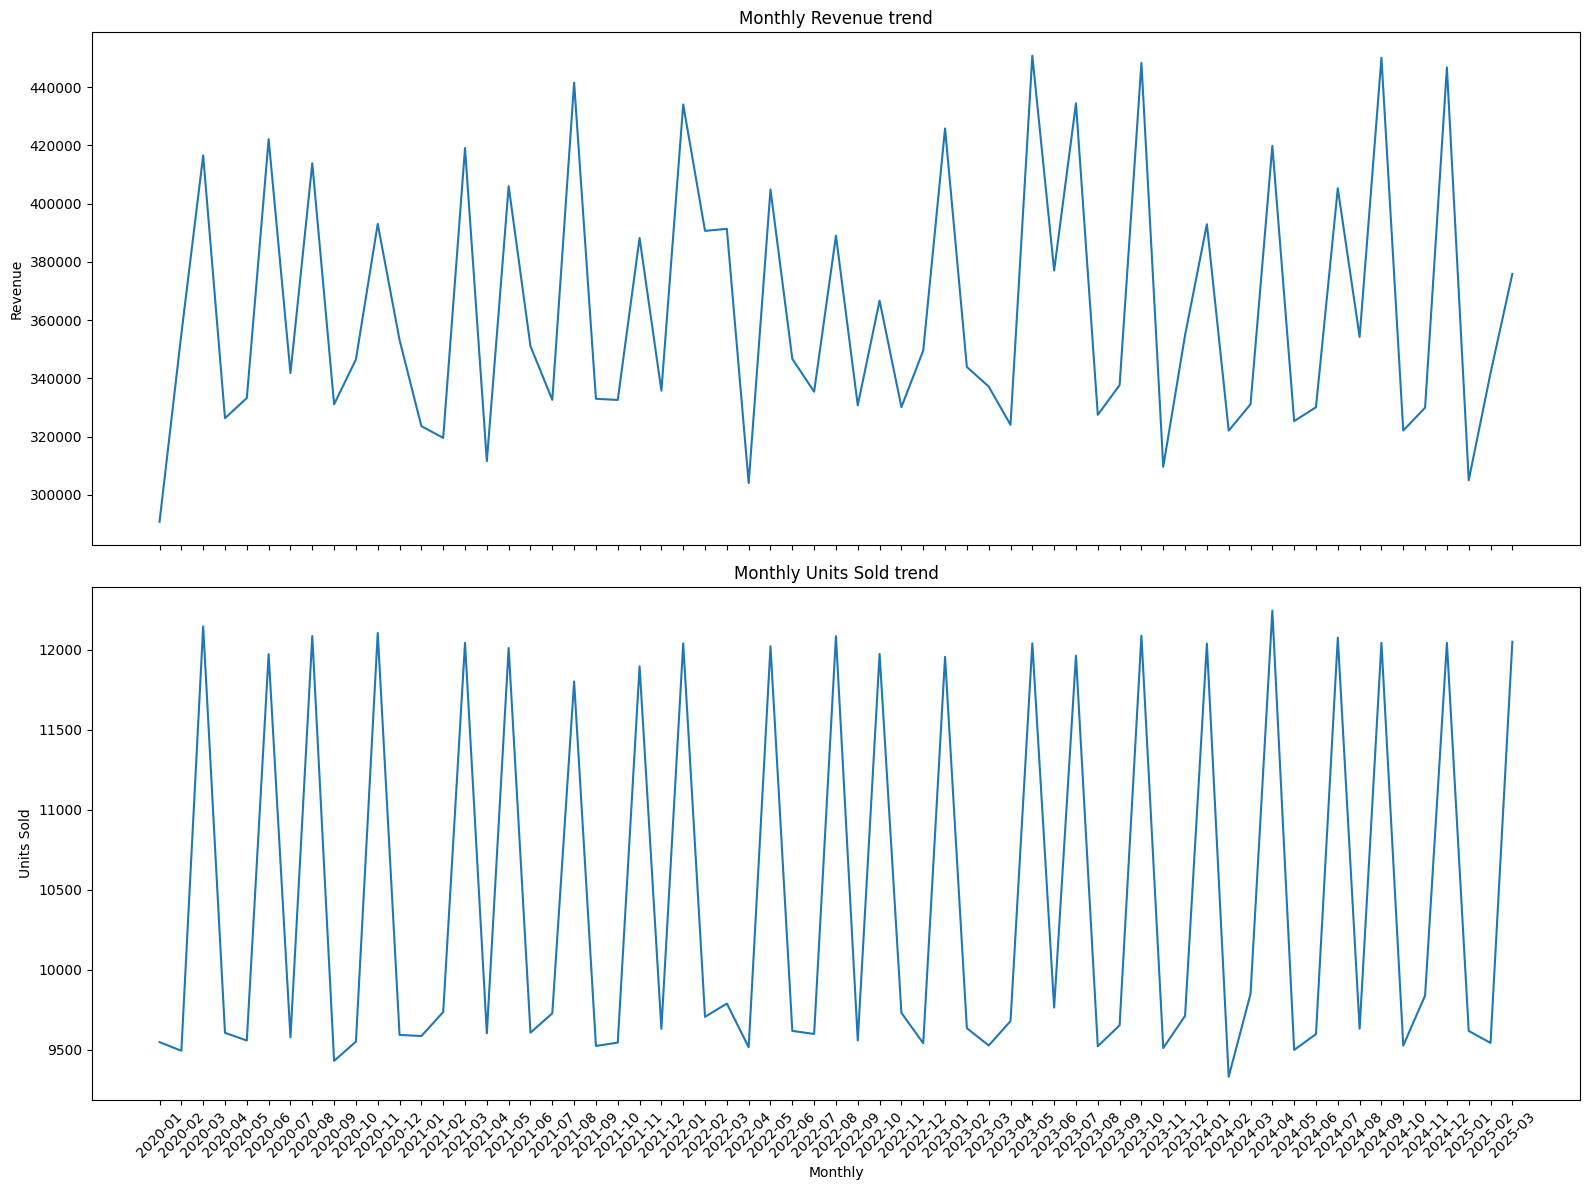

In [ ]:
monthly["Monthly"] = monthly["Monthly"].astype("str")

fig, axes = plt.subplots(2,1, sharex=True, figsize=(16,12))

sns.lineplot(data=monthly, x="Monthly", y="Revenue", ax=axes[0])
axes[0].set_title("Monthly Revenue trend")
axes[0].tick_params(axis="x", rotation=45)

sns.lineplot(data=monthly, x="Monthly", y="Units Sold", ax=axes[1])
axes[1].set_title("Monthly Units Sold trend")
axes[1].tick_params(axis="x", rotation=45)

plt.tight_layout()
plt.show()

Analyse monthly revenue and sales volume trends over time, helping stakeholders identify patterns such as seasonality, growth, and demand consistency. Two line charts were plotted using Seaborn and Matplotlib: *   Top chart → monthly revenue trend

*   Bottom chart → monthly units sold trend

*   Both charts span 2020–2025, giving a medium-term performance perspective.

Results:

*   Revenue shows consistent fluctuations between £300k–£450k, with no major upward or downward long-term trend. Peaks appear regularly (e.g., March and December months).

*   Units Sold follow a repeating pattern, cycling between ~9,200 and ~12,200 units each month. The pattern appears highly seasonal, suggesting predictable spikes in demand.

*   Revenue and units sold trends broadly move together, though pricing also influences revenue peaks.

Insights & Value:

*   Predictable seasonality → Regular peaks around March (fitness/pre-summer push) and December (holiday/New Year surge) suggest these months are consistent drivers of growth.

*   Stable baseline → Both revenue and units sold remain within relatively narrow bands month-to-month, highlighting a mature, stable market.

*   Strategic actions → Inventory, marketing, and promotional campaigns should be synchronised with seasonal demand spikes to maximise ROI.

*   Margin protection → Because revenue peaks are not always proportionally higher than units sold, pricing and discount strategy remain key levers for profit optimisation.

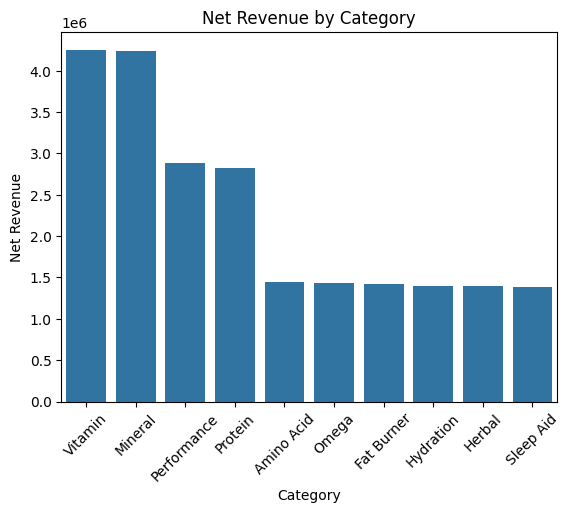

In [ ]:
df["Net Revenue"] = df["Revenue"] - (df["Units Returned"]) * df["Price"]

catergory_profit = df.groupby("Category")["Net Revenue"].sum().sort_values(ascending=False)

sns.barplot(x=catergory_profit.index, y=catergory_profit.values)
plt.title("Net Revenue by Category")
plt.ylabel("Net Revenue")
plt.xlabel("Category")
plt.xticks(rotation=45)
plt.show()

evaluate which product categories generate the highest net revenue after accounting for the cost of returns. This provides a more accurate measure of profitability than gross revenue and helps prioritise categories that deliver true financial value.

The bar chart reveals:

*   Vitamins and Minerals dominate net revenue, each generating over £4.2 million.

*   Performance (£2.9m) and Protein (£2.8m) form the second tier of contributors.

*   Remaining categories (Amino Acid, Omega, Fat Burner, Hydration, Herbal, Sleep Aid) cluster around £1.4–£1.5 million each.

*   The ranking mirrors the gross revenue analysis, confirming that returns have only a marginal impact on category profitability.

Insights & Value

*   Core profit drivers → Vitamins and Minerals are the financial backbone, justifying strong continued investment.

*   Mid-tier categories (Performance & Protein) → While smaller than the leaders, they represent high-growth opportunities if marketing or product innovation boosts their share.

*   Return-adjusted profitability → Low variation between gross and net revenue shows that returns are not materially eroding profitability, which reinforces consumer satisfaction and operational efficiency.

*   Strategic guidance → Resources can be allocated with confidence, knowing that the revenue picture aligns closely with profitability.

##Conclusion

This analysis of supplement sales data has provided valuable insights into both short-term performance and long-term business trends. By examining time-series patterns, category contributions, and the impact of returns and discounts, several key findings emerged:

*   Revenue growth is not uniform — certain periods show strong sales momentum, while others reveal dips that may be tied to seasonality or external factors.

*   Category performance is uneven — a few supplement categories drive the majority of net revenue, suggesting opportunities to double down on best-sellers while reassessing underperformers.

*   Returns and discounts significantly affect profitability — highlighting the need for strategies that minimize returns while using discounts more strategically.

*   Visual and interactive analysis clarified patterns that may otherwise be hidden in raw numbers, supporting more data-driven decision-making.

Overall, the project demonstrates the power of data analytics in transforming raw sales data into actionable business intelligence. These insights can guide inventory management, marketing campaigns, and strategic planning, ultimately helping the business strengthen profitability and capture growth opportunities.

As a natural next step, advanced forecasting models and customer segmentation could be applied to build a forward-looking strategy based on these historical patterns.

##Author
Toyosi Kehinde